## Code alongs- MLP - Multilayered perceptron

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentation 
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [12]:
x_train.shape

(60000, 28, 28)

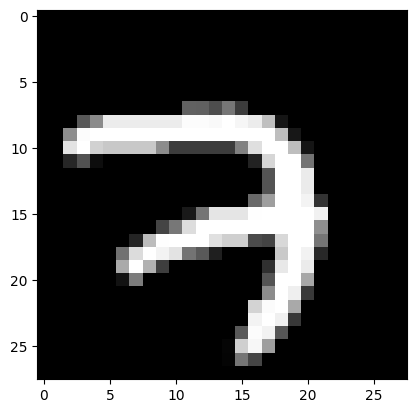

In [11]:
plt.imshow(x_train[5000], cmap="gray")

In [13]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
x_train[5000].shape

(28, 28)

In [18]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [19]:
# pixel value at row 10, col 5 for image 5000
x_train[5000, 10,5]

199

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

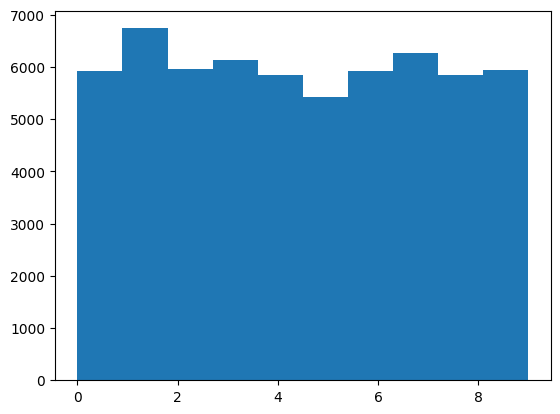

In [23]:
plt.hist(y_train)

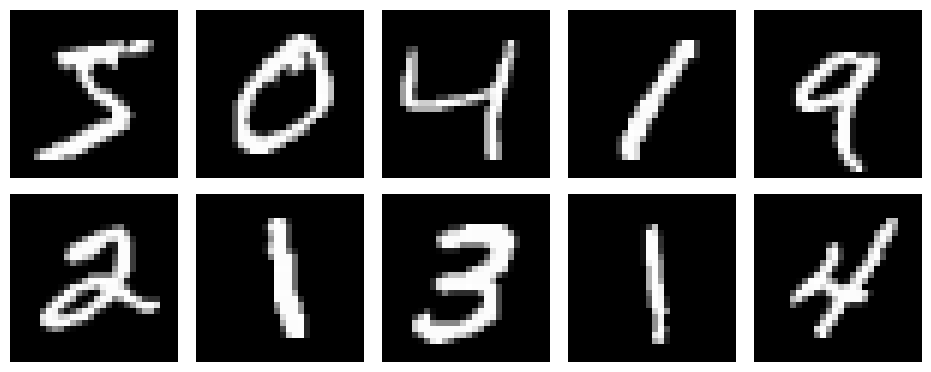

In [28]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap='gray')
        ax.axis('off')
    
    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

(10, 28, 28)

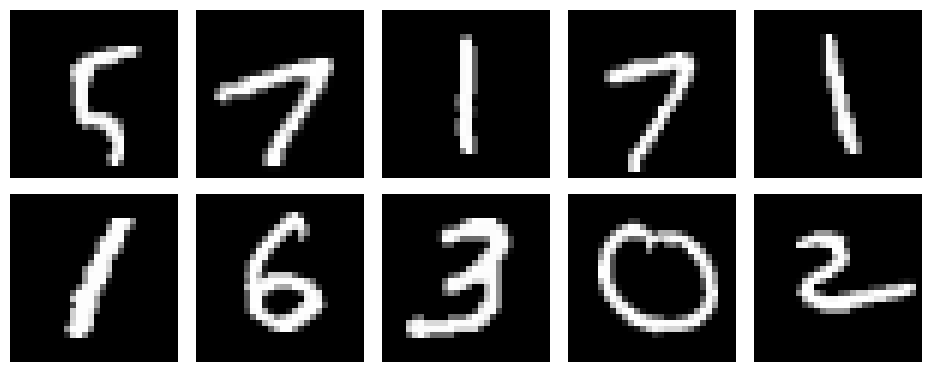

In [30]:
display_images(x_train[100:110])
x_train[100:110].shape

## Normalize data

In [34]:
# skalar ner datan till floats mellan 0 och 1. Kan även använda minmaxscaler från sklearn
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [38]:
# Blir en flatten ist. 28 x 28 istället för 28, 28.
X_train[5000].reshape(-1).shape

(784,)

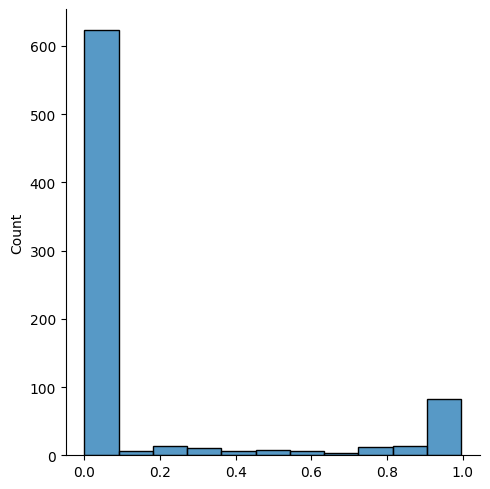

In [36]:
import seaborn as sns

sns.displot(data = X_train[5000].reshape(-1), kind='hist')

## MLP model

- 10 ooutput neurons/nodes (which represents 0,1,2,3,......,9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28x28) -> use Flatten layer
- hidden layers -> Dense layers

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def mlp_model(
    neurons: tuple | list = None,
    names: tuple | list = None,
    activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model


# mlp_model(neurons=[10], names=['Output_layer'], activations=['softmax']).summary()

model_naive = mlp_model(neurons=[10], names=['Output_layer'], activations=['softmax'])

model_naive.summary()

c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_naive.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.9339 - loss: 0.2337 - val_accuracy: 0.9323 - val_loss: 0.2562
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9335 - loss: 0.2394 - val_accuracy: 0.9301 - val_loss: 0.2548
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9335 - loss: 0.2365 - val_accuracy: 0.9306 - val_loss: 0.2557
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.9345 - loss: 0.2357 - val_accuracy: 0.9315 - val_loss: 0.2574
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.9340 - loss: 0.2377 - val_accuracy: 0.9309 - val_loss: 0.2567
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.9356 - loss: 0.2317 - val_accuracy: 0.9313 - val_loss: 0.2596
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.9349 - loss: 0.2355 - val_accuracy: 0.9320 - val_loss: 0.2590
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.9330 -

In [51]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.93236,0.241417,0.9323,0.256191
1,0.93262,0.240495,0.9301,0.254823
2,0.93312,0.239673,0.9306,0.255750
3,0.93354,0.238928,0.9315,0.257361
4,0.93370,0.238620,0.9309,0.256725


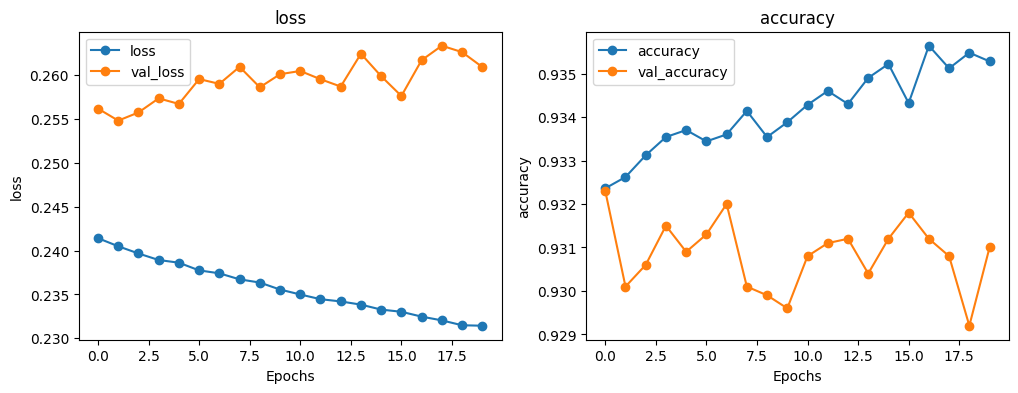

In [55]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style
        )

plot_metrics(naive_history)

## Add hidden layers

In [58]:
model_deep = mlp_model(
    neurons=[128, 128, 10],
    activations=["relu", "relu", "softmax"],
    names=["Hidden_1", "Hidden_2", "Output"],
)

model_deep.summary()

c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model_deep.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8723 - loss: 0.4466 - val_accuracy: 0.9672 - val_loss: 0.1174
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9667 - loss: 0.1087 - val_accuracy: 0.9702 - val_loss: 0.0987
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0660 - val_accuracy: 0.9713 - val_loss: 0.1003
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0486 - val_accuracy: 0.9758 - val_loss: 0.0831
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9880 - loss: 0.0381 - val_accuracy: 0.9761 - val_loss: 0.0873
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9784 - val_loss: 0.0845
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9931 - loss: 0.0220 - val_accuracy: 0.9740 - val_loss: 0.1080
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9930 - loss: 0.0204 - 

In [60]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92638,0.252270,0.9672,0.117430
1,0.96798,0.103849,0.9702,0.098681
2,0.97828,0.069806,0.9713,0.100265
3,0.98342,0.051405,0.9758,0.083089
4,0.98684,0.041253,0.9761,0.087256


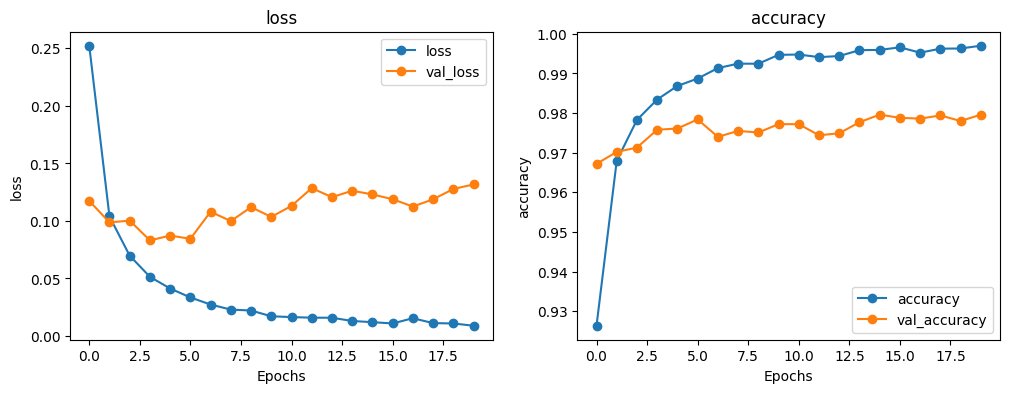

In [61]:
plot_metrics(deep_history)

In [62]:
# train on all the training data
model_deep.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9931 - loss: 0.0289
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9966 - loss: 0.0101


## Prediction and evaluation

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.0667209e-16, 2.3872752e-13, 4.8509200e-11, ..., 1.0000000e+00,
        1.4698697e-15, 5.9655245e-12],
       [4.1991481e-18, 2.6176628e-12, 1.0000000e+00, ..., 4.0307883e-13,
        2.6977585e-13, 8.7521772e-18],
       [6.5171528e-13, 9.9999726e-01, 6.6177830e-07, ..., 4.6578617e-07,
        4.3944999e-07, 5.2133120e-12],
       ...,
       [9.3755710e-27, 2.6378870e-23, 2.5025031e-27, ..., 9.3809694e-20,
        4.1625397e-21, 5.1051747e-19],
       [1.6133163e-20, 5.8713921e-31, 2.3087020e-22, ..., 3.7489209e-31,
        4.9132867e-09, 2.2759920e-27],
       [8.6185209e-19, 1.8835412e-27, 3.5400438e-19, ..., 5.3942139e-28,
        4.3960116e-15, 6.2735788e-20]], dtype=float32)

In [65]:
y_pred[0]

array([3.0667209e-16, 2.3872752e-13, 4.8509200e-11, 4.5063442e-10,
       1.7839225e-17, 6.7742903e-17, 1.9597841e-19, 1.0000000e+00,
       1.4698697e-15, 5.9655245e-12], dtype=float32)

In [66]:
y_pred[1]

array([4.1991481e-18, 2.6176628e-12, 1.0000000e+00, 3.7705423e-08,
       1.2109471e-22, 9.3997868e-18, 8.9170502e-23, 4.0307883e-13,
       2.6977585e-13, 8.7521772e-18], dtype=float32)

In [67]:
y_pred[2]

array([6.5171528e-13, 9.9999726e-01, 6.6177830e-07, 9.0052918e-15,
       1.1996315e-06, 5.9967270e-10, 1.0208913e-09, 4.6578617e-07,
       4.3944999e-07, 5.2133120e-12], dtype=float32)

In [69]:
y_pred.shape

(10000, 10)

In [71]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



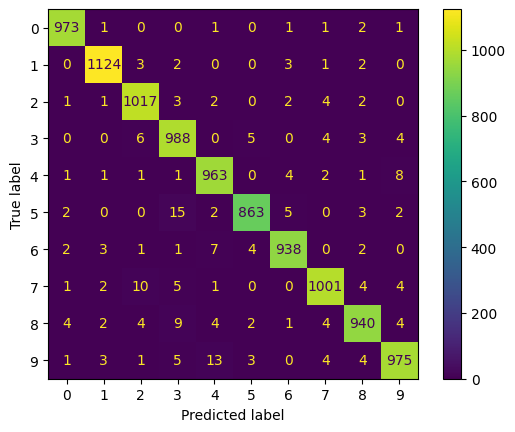

In [78]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Some missclasifications

In [76]:
(y_pred != y_test).sum()

218

In [79]:
misscclassified_indices = np.where(y_pred != y_test)[0]
misscclassified_indices[:10]

array([149, 217, 247, 268, 274, 340, 381, 389, 445, 448], dtype=int64)

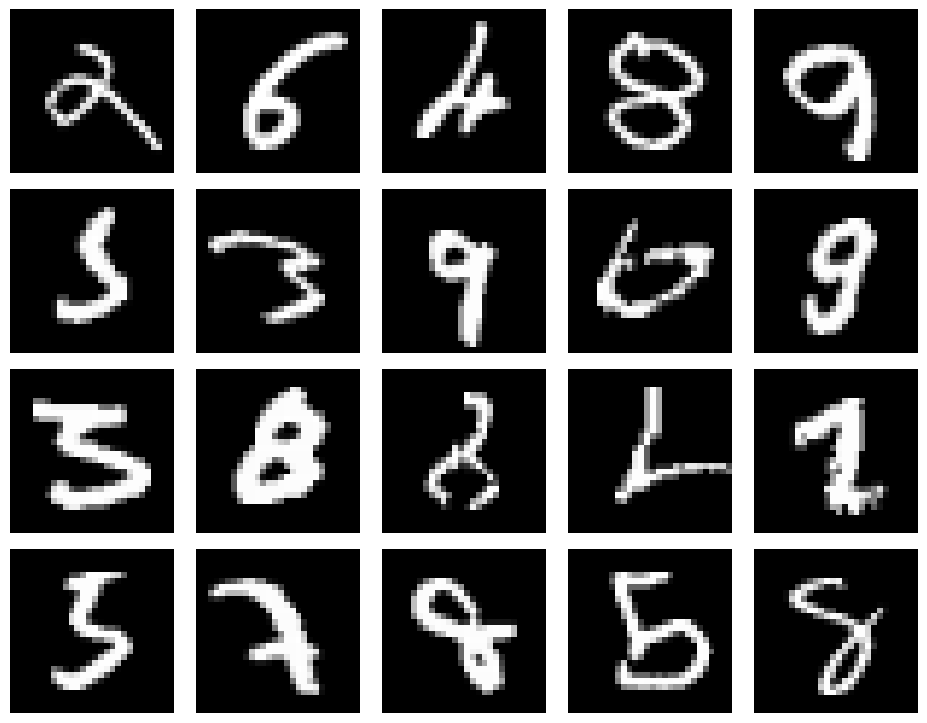

In [80]:
display_images(X_test[misscclassified_indices], 4,5, (12,8))